# Joining Processed Data

This section joins data processed from data_extraction.ipynb and returns numpy representation of pandas dfs compatible with sklearn. 

NA values in df1 and df2 are filled with medians of their respective columns (may be testing other options like cosine similarity for missing data).

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#import keras
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

In [2]:
demos = pd.read_csv("demos_clean.csv")
demos.drop(demos.columns[[0]], axis=1, inplace=True)
all_achi = pd.read_csv("all_achi.csv")
all_achi.drop(all_achi.columns[[0]], axis=1, inplace=True)
sw_achi = pd.read_csv("sw_achi.csv")
sw_achi.drop(sw_achi.columns[[0]], axis=1, inplace=True)
sw_achi_1516 = pd.read_csv("sw_achi_1516.csv")
sw_achi_1516.drop(sw_achi_1516.columns[[0]], axis=1, inplace=True)

In [3]:
df1_sw_oracle = pd.merge(demos, sw_achi_1516, on='school_id', how='inner')
df1_sw_oracle = pd.merge(df1_sw_oracle, sw_achi, on='school_id', how='inner')
df1_sw_oracle = df1_sw_oracle.rename(columns={'schoolwide_achi_x': 'schoolwide_achi_1516', 'schoolwide_achi_y': 'schoolwide_achi_1617'})
df1_sw_oracle = df1_sw_oracle.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
df1_sw_oracle = df1_sw_oracle.dropna(how='any')

In [4]:
grad = pd.read_csv("grad_clean.csv")
grad.drop(grad.columns[[0]], axis=1, inplace=True)
financials = pd.read_csv("financials_clean.csv")
financials.drop(financials.columns[[0]], axis=1, inplace=True)

In [5]:
df2_sw_oracle = pd.merge(demos, grad, on='school_id', how='inner')
df2_sw_oracle = pd.merge(df2_sw_oracle, financials, on='district_id', how='inner')
df2_sw_oracle = pd.merge(df2_sw_oracle, sw_achi_1516, on='school_id', how='inner')
df2_sw_oracle = pd.merge(df2_sw_oracle, sw_achi, on='school_id', how='inner')
df2_sw_oracle = df2_sw_oracle.rename(columns={'schoolwide_achi_x': 'schoolwide_achi_1516', 'schoolwide_achi_y': 'schoolwide_achi_1617'})

In [6]:
#drop attributes used for data processing
df2_sw_oracle = df2_sw_oracle.drop(columns=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'])
#drop attributes that were pulled, but not predictive
df2_sw_oracle = df2_sw_oracle.drop(columns=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'])
#engineer features so they reflect per student values
df2_sw_oracle.total_salaries = df2_sw_oracle.total_salaries/df2_sw_oracle.total
df2_sw_oracle.salaries_instruction = df2_sw_oracle.salaries_instruction/df2_sw_oracle.total
df2_sw_oracle.salaries_teachers = df2_sw_oracle.salaries_teachers/df2_sw_oracle.total
df2_sw_oracle = df2_sw_oracle.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})

In [7]:
#impute na with median
for i in range(len(df2_sw_oracle.columns)):
    df2_sw_oracle.iloc[:, i] = df2_sw_oracle.iloc[:, i].fillna(df2_sw_oracle.iloc[:, i].median(skipna=True))

# Oracle Linear Regression

In [8]:
data = df1_sw_oracle.values

In [9]:
df1_sw_oracle.dtypes

pct_native              float64
pct_asian               float64
pct_hispanic            float64
pct_black               float64
pct_white               float64
pct_pacisl              float64
pct_mixed               float64
free_lunch              float64
reduced_lunch           float64
total                   float64
schoolwide_achi_1516    float64
schoolwide_achi_1617    float64
dtype: object

In [10]:
features = data[:, 10:11]
labels = data[:, 11]

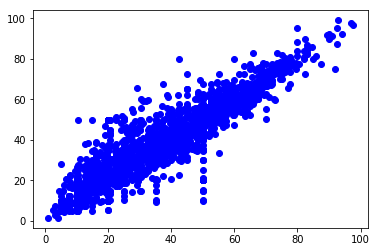

In [18]:
plt.scatter(features[:, 0], labels, color='blue')

In [21]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [22]:
lr = LinearRegression(normalize=True)

In [23]:
model = lr.fit(train, train_labels)

In [24]:
score = model.score(test, test_labels)
print(score)

0.8354472022689599


In [25]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

65.40331582131245


## DF1 Features (on sw_achi)

In [20]:
data = df1_sw_oracle.values

In [21]:
df1_sw_oracle.dtypes

pct_native              float64
pct_asian               float64
pct_hispanic            float64
pct_black               float64
pct_white               float64
pct_pacisl              float64
pct_mixed               float64
free_lunch              float64
reduced_lunch           float64
total                   float64
schoolwide_achi_1516    float64
schoolwide_achi_1617    float64
dtype: object

In [22]:
features = data[:, 0:11]
labels = data[:, 11]

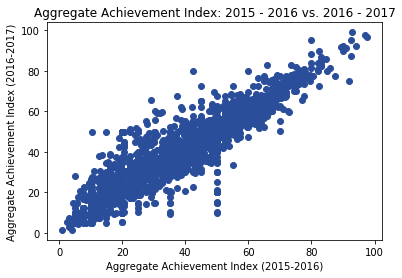

In [30]:
plt.scatter(features[:, 10], labels, color='#2b4e9b')
plt.title("Aggregate Achievement Index: 2015 - 2016 vs. 2016 - 2017")
plt.xlabel("Aggregate Achievement Index (2015-2016)")
plt.ylabel("Aggregate Achievement Index (2016-2017)")
plt.show()

In [49]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [50]:
lr = LinearRegression(normalize=True)

In [51]:
model = lr.fit(train, train_labels)

In [52]:
score = model.score(test, test_labels)
print(score)

0.8587687236252087


In [53]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

53.785944955560225


In [60]:
test_pred = model.predict(test)
mse_lr_abs = mean_absolute_error(test_labels, test_pred)
print(mse_lr_abs)

5.363221914556962


In [8]:
df1_sw_oracle.dtypes

pct_native              float64
pct_asian               float64
pct_hispanic            float64
pct_black               float64
pct_white               float64
pct_pacisl              float64
pct_mixed               float64
free_lunch              float64
reduced_lunch           float64
total                   float64
schoolwide_achi_1516    float64
schoolwide_achi_1617    float64
dtype: object

In [9]:
data = df1_sw_oracle.values

In [10]:
features = data[:, 0:11]
labels = data[:, 11]

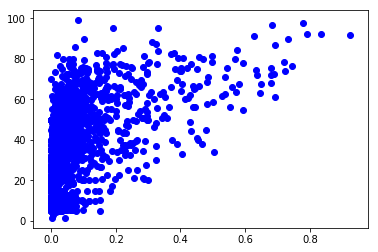

In [11]:
plt.scatter(features[:, 1], labels, color='blue')

In [12]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [13]:
lr = LinearRegression(normalize=True)

In [14]:
model = lr.fit(train, train_labels)

In [15]:
score = model.score(test, test_labels)
print(score)

0.8492963397195818


In [18]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

57.45121266811709


In [31]:
# Support Vector Machine, but with regression
from sklearn.svm import LinearSVR
svmRg = LinearSVR(max_iter=1000) #dual=False)
svmRg.fit(train, train_labels)
svmRgScore = svmRg.score(test, test_labels)
svmRgScore # L1 loss score, uses loss function 'epsilon-insensitive'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8124432771233112

In [32]:
test_pred = svmRg.predict(test)
mse_svm = mean_squared_error(test_labels, test_pred)
print(mse_svm)

71.5003282154777


In [33]:
# Trying regression again
from sklearn.ensemble import ExtraTreesRegressor
extTreeRg = ExtraTreesRegressor(n_estimators=100)
extTreeRg.fit(train, train_labels)
extTreeRgScore = extTreeRg.score(test, test_labels)
extTreeRgScore # note: this is R^2 coefficient

0.8574321268665734

In [34]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

54.34968987341773


In [35]:
from sklearn.ensemble import RandomForestRegressor
randForsRg = RandomForestRegressor(n_estimators=100)
randForsRg.fit(train, train_labels)
randForsRgScore = randForsRg.score(test, test_labels)
randForsRgScore # R^2 coefficient

0.8605499718728098

In [36]:
test_pred = randForsRg.predict(test)
mse_rfr = mean_squared_error(test_labels, test_pred)
print(mse_rfr)

53.161105759493665


## DF2 Features (on sw_achi)

In [37]:
df2_sw_oracle.dtypes

pct_native                 float64
pct_asian                  float64
pct_hispanic               float64
pct_black                  float64
pct_white                  float64
pct_pacisl                 float64
pct_mixed                  float64
free_lunch                 float64
reduced_lunch              float64
total                      float64
grad_rate_all              float64
grad_rate_native           float64
grad_rate_asian            float64
grad_rate_black            float64
grad_rate_hispanic         float64
grad_rate_mixed            float64
grad_rate_linc             float64
total_salaries_ps          float64
salaries_instruction_ps    float64
salaries_teachers_ps       float64
schoolwide_achi_1516       float64
schoolwide_achi_1617       float64
dtype: object

In [38]:
data_add = df2_sw_oracle.values

In [39]:
features_add = data_add[:, 0:21]
labels_add = data_add[:, 21]

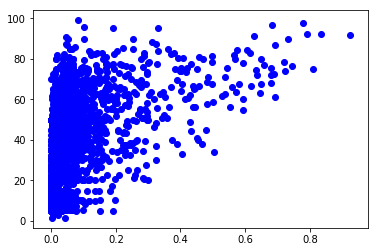

In [40]:
plt.scatter(features_add[:, 1], labels_add, color='blue')

In [41]:
train_add, test_add, train_labels_add, test_labels_add = train_test_split(features_add, labels_add, test_size = 0.2)

In [42]:
lr_add = LinearRegression(normalize=True)

In [43]:
model_add = lr_add.fit(train_add, train_labels_add)

In [44]:
score_add = model_add.score(test_add, test_labels_add)
print(score_add)

0.8430233584115601


In [52]:
test_pred = model_add.predict(test_add)
mse_lr = mean_squared_error(test_labels_add, test_pred_add)
print(mse_lr)

59.76126896152173


In [46]:
# Support Vector Machine, but with regression
from sklearn.svm import LinearSVR
svmRg = LinearSVR(max_iter=100000) #dual=False)
svmRg.fit(train, train_labels)
svmRgScore = svmRg.score(test, test_labels)
svmRgScore # L1 loss score, uses loss function 'epsilon-insensitive'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7616027689297324

In [47]:
test_pred = svmRg.predict(test)
mse_svm = mean_squared_error(test_labels, test_pred)
print(mse_svm)

90.88173436679176


In [48]:
# Trying regression again
from sklearn.ensemble import ExtraTreesRegressor
extTreeRg = ExtraTreesRegressor(n_estimators=100)
extTreeRg.fit(train, train_labels)
extTreeRgScore = extTreeRg.score(test, test_labels)
extTreeRgScore # note: this is R^2 coefficient

0.8584465513929621

In [49]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

53.96297120253165


In [50]:
from sklearn.ensemble import RandomForestRegressor
randForsRg = RandomForestRegressor(n_estimators=100)
randForsRg.fit(train, train_labels)
randForsRgScore = randForsRg.score(test, test_labels)
randForsRgScore # R^2 coefficient

0.8599492095448351

In [51]:
test_pred = randForsRg.predict(test)
mse_rfr = mean_squared_error(test_labels, test_pred)
print(mse_rfr)

53.3901282278481


# Oracle Multi-Class Classification (on sw_achi)

In [127]:
print('max:', df1_sw_oracle['schoolwide_achi_1617'].max())
print('min: ', df1_sw_oracle['schoolwide_achi_1617'].min())

max: 99.0
min:  1.5


# Ten Class

## DF1 Features

In [128]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df1_sw_oracle['schoolwide_achc'] = pd.cut(df1_sw_oracle.schoolwide_achi_1617, bins, labels = names, right = False)

In [130]:
ten_class_achidf1_sw_oracle = df1_sw_oracle.values

In [131]:
mc_features = ten_class_achidf1_sw_oracle[:, 0:11]
mc_labels = ten_class_achidf1_sw_oracle[:, 12]

In [132]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [133]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [134]:
mc_model = mclr.fit(mc_train, mc_train_labels)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [135]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.45569620253164556


## DF2 Features

In [136]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']
df2_sw_oracle['schoolwide_achc'] = pd.cut(df2_sw_oracle.schoolwide_achi_1617, bins, labels = names, right = False)

In [143]:
df2_sw_oracle.dtypes

pct_native                  float64
pct_asian                   float64
pct_hispanic                float64
pct_black                   float64
pct_white                   float64
pct_pacisl                  float64
pct_mixed                   float64
free_lunch                  float64
reduced_lunch               float64
total                       float64
grad_rate_all               float64
grad_rate_native            float64
grad_rate_asian             float64
grad_rate_black             float64
grad_rate_hispanic          float64
grad_rate_mixed             float64
grad_rate_linc              float64
total_salaries_ps           float64
salaries_instruction_ps     float64
salaries_teachers_ps        float64
schoolwide_achi_1516        float64
schoolwide_achi_1617        float64
schoolwide_achc            category
dtype: object

In [137]:
ten_class_achidf2_sw_oracle = df2_sw_oracle.values

In [144]:
mc_features_add = ten_class_achidf2_sw_oracle[:, 0:21]
mc_labels_add = ten_class_achidf2_sw_oracle[:, 22]

In [145]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [146]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [147]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [148]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.2519809825673534


# Four Class

## DF1 Features

In [149]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df1_sw_oracle['schoolwide_achc'] = pd.cut(df1_sw_oracle.schoolwide_achi_1617, bins, labels = names, right = False)

In [150]:
four_class_achidf1_sw_oracle = df1_sw_oracle.values

In [151]:
mc_features = four_class_achidf1_sw_oracle[:, 0:11]
mc_labels = four_class_achidf1_sw_oracle[:, 12]

In [152]:
mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

In [153]:
from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [154]:
mc_model = mclr.fit(mc_train, mc_train_labels)

In [155]:
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)

0.7848101265822784


## DF2 Features

In [156]:
bins = [0, 25, 50, 75, 101]
names = ['[0-25)', '[25-50)', '[50-75)', '[75-100]']
df2_sw_oracle['schoolwide_achc'] = pd.cut(df2_sw_oracle.schoolwide_achi_1617, bins, labels = names, right = False)

In [163]:
df2_sw_oracle.dtypes

pct_native                  float64
pct_asian                   float64
pct_hispanic                float64
pct_black                   float64
pct_white                   float64
pct_pacisl                  float64
pct_mixed                   float64
free_lunch                  float64
reduced_lunch               float64
total                       float64
grad_rate_all               float64
grad_rate_native            float64
grad_rate_asian             float64
grad_rate_black             float64
grad_rate_hispanic          float64
grad_rate_mixed             float64
grad_rate_linc              float64
total_salaries_ps           float64
salaries_instruction_ps     float64
salaries_teachers_ps        float64
schoolwide_achi_1516        float64
schoolwide_achi_1617        float64
schoolwide_achc            category
dtype: object

In [164]:
four_class_achidf2_sw_oracle = df2_sw_oracle.values

In [165]:
mc_features_add = four_class_achidf2_sw_oracle[:, 0:21]
mc_labels_add = four_class_achidf2_sw_oracle[:, 22]

In [166]:
mc_train_add, mc_test_add, mc_train_labels_add, mc_test_labels_add = train_test_split(mc_features_add, mc_labels_add, test_size = 0.2)

In [167]:
mclr_add = LogisticRegression(solver = 'lbfgs', max_iter=10000, multi_class='multinomial')

In [168]:
mc_model_add = mclr_add.fit(mc_train_add, mc_train_labels_add)

In [169]:
mc_score_add = mc_model_add.score(mc_test_add, mc_test_labels_add)
print(mc_score_add)

0.43898573692551507
